In [1]:
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
from growth.sweep.sweep import Sweep
from clones.validation.sweep import SweepBenchmark
from clones.visualization.settings import *
%matplotlib inline

In [19]:
figsize = (2, 2)
savedir = './graphics/synthetic/'
savefig = lambda fig, name: fig.savefig(join(savedir, '{:s}.pdf'.format(name)), dpi=400, rasterized=True, transparent=True)

# Synthetic data generation

In [4]:
from growth.sweep.simulation import GrowthSimulation

In [6]:
#simulation = GrowthSimulation(division_rate=0.2, recombination_rate=0.2)
simulation = GrowthSimulation.load('./growth_example.pkl/')

In [9]:
# find generation indices
gen = 2
ts = []
for t, cells in enumerate(simulation.history):
    n = len(cells)    
    if np.log2(n) >= gen:
        ts.append(t)
        gen += 1

In [13]:
simulations = [simulation.branch(t) for t in snapshots]

In [14]:
""" Generate microscopy. """

ambiguity, rho, bleedthrough = 0., 0., 0.

measurement_kwargs = dict(
    expression_capacity_sigma=1.,
    nuclear_stain_level=2.,
    control_level=0.5,
    nuclear_stain_sigma=0.01,
    control_sigma=0.01,
    measurement_noise=0.
)

kwargs = dict(
    measurement_kwargs=measurement_kwargs,
    microscopy_kwargs={'bg_level':0.2, 'radius': 6})

row = 1
images = {}
for i, simulation in enumerate(simulations):    
    image = simulation.generate_microscopy(ambiguity, rho, bleedthrough, **kwargs)[1]
    images[i] = image

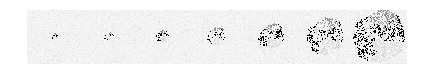

In [20]:
nrows = 1
ncols = 7
size = 1

start = 3

fig = plt.figure(figsize=(ncols*size-0.2, nrows*size))
gs = GridSpec(nrows, ncols, wspace=0., hspace=0.)
axes = [fig.add_subplot(gs[i]) for i in range(nrows*ncols)]
for i, ax in enumerate(axes):
    ax.axis('off')
    _ = images[start+i].render(ax=ax)

#savefig(fig, 'growth_strip')

In [23]:
for sim in simulations[start:]:
    print(sim.size)

36
75
130
278
565
1175
2377


In [24]:
2**5

32